In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_infos = []
for i in range(6): # 6 clusters
    path = '../Data/Cluster'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df_info = df.mean().append(pd.Series({"count":len(df)}))
    df_infos.append(df_info[2:]) # id averages are meaningless
#     print(i, df.mean(), len(df), sep="\n")
cluster_summaries = pd.concat(df_infos, axis=1).T
cluster_summaries

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
0,20358.792039,1.114565,161.322302,79.092710,145.566041,90.890429,1.564773,1.089967,0.001193,0.000075,0.805531,0.811345,13416.0
1,20378.194855,1.248151,163.265636,77.267636,129.843813,82.705447,2.386516,2.806321,0.021856,0.006052,0.789845,0.624748,5948.0
2,19142.787017,1.698343,167.772652,77.923564,128.783978,82.709116,1.448895,1.232044,0.499171,1.000000,0.843646,0.472376,3620.0
3,19094.488709,1.859597,169.329161,76.916986,127.289151,81.617084,1.336033,1.166176,1.000000,0.000000,0.832106,0.471527,4074.0
4,19275.916052,1.977406,170.765542,76.718372,124.618954,80.627680,1.179125,1.055604,0.000000,0.000000,0.786647,0.466211,14783.0
5,19015.295391,1.014064,161.535949,68.253212,116.918351,76.240783,1.130555,1.043468,0.000038,0.000000,0.804636,0.327308,26663.0


In [3]:
cluster_summaries["baseline"] = pd.concat([cluster_summaries["cardio"], 1-cluster_summaries["cardio"]],axis=1).max(axis=1)
cluster_summaries#.sort_values(by=['baseline'], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count,baseline
0,20358.792039,1.114565,161.322302,79.092710,145.566041,90.890429,1.564773,1.089967,0.001193,0.000075,0.805531,0.811345,13416.0,0.811345
1,20378.194855,1.248151,163.265636,77.267636,129.843813,82.705447,2.386516,2.806321,0.021856,0.006052,0.789845,0.624748,5948.0,0.624748
2,19142.787017,1.698343,167.772652,77.923564,128.783978,82.709116,1.448895,1.232044,0.499171,1.000000,0.843646,0.472376,3620.0,0.527624
3,19094.488709,1.859597,169.329161,76.916986,127.289151,81.617084,1.336033,1.166176,1.000000,0.000000,0.832106,0.471527,4074.0,0.528473
4,19275.916052,1.977406,170.765542,76.718372,124.618954,80.627680,1.179125,1.055604,0.000000,0.000000,0.786647,0.466211,14783.0,0.533789
5,19015.295391,1.014064,161.535949,68.253212,116.918351,76.240783,1.130555,1.043468,0.000038,0.000000,0.804636,0.327308,26663.0,0.672692


In [4]:
cluster_summaries.to_csv('cluster_summaries.csv')

In [5]:
n,m = cluster_summaries.shape
cluster_summaries["age"] = cluster_summaries["age"].div(365)
cluster_summaries.sort_values(by=['count'], ascending=False) #8,6,(1),7

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count,baseline
5,52.096700,1.014064,161.535949,68.253212,116.918351,76.240783,1.130555,1.043468,0.000038,0.000000,0.804636,0.327308,26663.0,0.672692
4,52.810729,1.977406,170.765542,76.718372,124.618954,80.627680,1.179125,1.055604,0.000000,0.000000,0.786647,0.466211,14783.0,0.533789
0,55.777512,1.114565,161.322302,79.092710,145.566041,90.890429,1.564773,1.089967,0.001193,0.000075,0.805531,0.811345,13416.0,0.811345
1,55.830671,1.248151,163.265636,77.267636,129.843813,82.705447,2.386516,2.806321,0.021856,0.006052,0.789845,0.624748,5948.0,0.624748
3,52.313668,1.859597,169.329161,76.916986,127.289151,81.617084,1.336033,1.166176,1.000000,0.000000,0.832106,0.471527,4074.0,0.528473
2,52.445992,1.698343,167.772652,77.923564,128.783978,82.709116,1.448895,1.232044,0.499171,1.000000,0.843646,0.472376,3620.0,0.527624


In [6]:
cluster_summaries.sort_values(by=['cardio'], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count,baseline
0,55.777512,1.114565,161.322302,79.092710,145.566041,90.890429,1.564773,1.089967,0.001193,0.000075,0.805531,0.811345,13416.0,0.811345
1,55.830671,1.248151,163.265636,77.267636,129.843813,82.705447,2.386516,2.806321,0.021856,0.006052,0.789845,0.624748,5948.0,0.624748
2,52.445992,1.698343,167.772652,77.923564,128.783978,82.709116,1.448895,1.232044,0.499171,1.000000,0.843646,0.472376,3620.0,0.527624
3,52.313668,1.859597,169.329161,76.916986,127.289151,81.617084,1.336033,1.166176,1.000000,0.000000,0.832106,0.471527,4074.0,0.528473
4,52.810729,1.977406,170.765542,76.718372,124.618954,80.627680,1.179125,1.055604,0.000000,0.000000,0.786647,0.466211,14783.0,0.533789
5,52.096700,1.014064,161.535949,68.253212,116.918351,76.240783,1.130555,1.043468,0.000038,0.000000,0.804636,0.327308,26663.0,0.672692


In [7]:
# check overall target %
sum(cluster_summaries["cardio"]*cluster_summaries["count"])/sum(cluster_summaries["count"])

0.49414632722176804

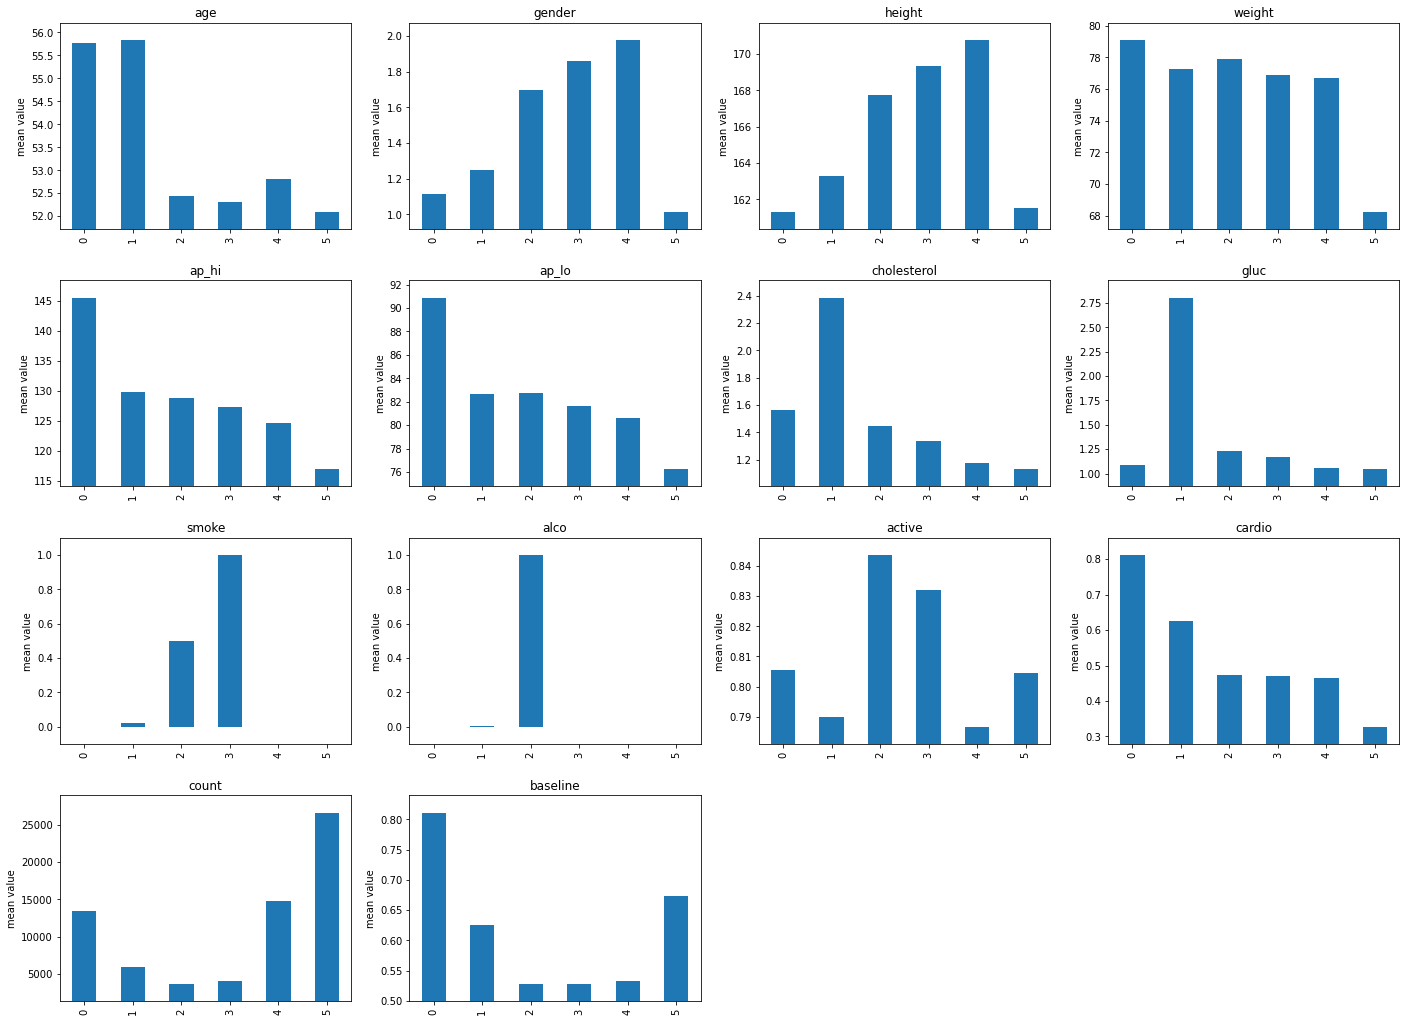

In [8]:
import math
p = math.ceil(math.sqrt(m))
fig, axes = plt.subplots(nrows=p, ncols=p,figsize=(24,18))

plt.subplots_adjust(wspace=0.2, hspace=0.25)

(i,j) = 0,0
for col in cluster_summaries.columns:
    cluster_summaries[col].plot.bar(ax=axes[j//p, j%p])
    axes[j//p, j%p].set_title(col)
    axes[j//p, j%p].set_ylabel("mean value")
    buffer = .1 * (max(cluster_summaries[col]) - min(cluster_summaries[col]))
    axes[j//p, j%p].set_ylim(min(cluster_summaries[col]) - buffer, max(cluster_summaries[col]) + buffer)
    
#     axes[j//p, j%p].savefig(col)
    j += 1
    
for r in range(j,p**2): # remove extra axis
    axes[r//p, r%p].set_axis_off()

plt.savefig("cluster_sums")

### Key Observations:
- Cluster 0: high cholesterol
- Cluster 1: lowest cvd%, youngest
- Cluster 2: pure smokers (no alcohol)
- Cluster 3: high glucose, high cholesterol
- Cluster 4: fewest members, highest cvd%, high blood pressure
- Cluster 5: alcoholics, some smokers
- Cluster 6: more male
- Cluster 7: not active at all
- Cluster 8: more female

In [9]:
# ideally, scatter with cluster index labels